In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import random

In [2]:
# 전력데이터: 2002/01-2018/07, kwh
df = pd.DataFrame([922420032, 880648021, 804733361, 828761235, 790549031, 807539314,
846112433, 924888900, 863557934, 823238917, 883011132, 917473766,
990936154, 962716643, 851468298, 881425095, 844313139, 855593486,
875652718, 954582833, 916690038, 862455117, 912476875, 946378798,
998274000, 1022829195, 929971407, 926835995, 887578685, 903491912,
935120155, 1122195271, 970079337, 890996555, 933808144, 961075662,
1050920625, 1034572645, 948016445, 968531307, 908560679, 958405834,
994928561, 1131223621, 998856708, 933186890, 954645208, 1026299168,
1107775999, 1043067709, 960353657, 997995314, 927895276, 963553140,
993732158, 1158684897, 1066868302, 917459411, 991928154, 1037158183,
1075304621, 1073291433, 960530929, 1016992424, 954143700, 982472120,
1014115061, 1157598056, 1107259787, 978021576, 1017440555, 1054306032,
1124888475, 1124235477, 1021684277, 1033052693, 971076353, 998593876,
1050143575, 1188894377, 1083407459, 987594184, 1033460844, 1070483341,
1153275775, 1136369233, 1004472057, 1054514188, 999567307, 1036912936,
1046459013, 1176868280, 1107489767, 1007941738, 1076724123, 1107186799,
1214066283, 1181407678, 1032894167, 1089843604, 1022333417, 1055099583,
1125863098, 1300709912, 1209522513, 1030154446, 1074271634, 1120564411,
1231391525, 1202148849, 1037947071, 1083898244, 1027707772, 1042578825,
1088429163, 1222763579, 1155030172, 1021589942, 1074036443, 1111069022,
1204661945, 1209164347, 1095407233, 1113920047, 1032064696, 1068539469,
1125530619, 1416388453, 1182228428, 1034657388, 1096243966, 1156905786,
1253151526, 1211925566, 1055373798, 1104487338, 1031804672, 1071977762,
1142485837, 1343740572, 1209799542, 1020085469, 1067593636, 1113620022,
1187067950, 1174713281, 1029042518, 1066274547, 1004895714, 1058558959,
1121937944, 1233458597, 1114598375, 1009580607, 1061203380, 1123393152,
1208344479, 1174628181, 1038607536, 1073072340, 999897891, 1041745162,
1099738961, 1328130456, 1146190108, 998797672, 1051814646, 1100125059,
1180825360, 1197875945, 1070581592, 1059935552, 997002150, 1046090879,
1139963902, 1509147408, 1263481826, 1004146216, 1049004254, 1094401105,
1171118030, 1181640954, 1029696089, 1061220776, 989051656, 1026417759,
1211781349, 1452964638, 1142452772, 996485102, 1048520709, 1132165546,
1218264077, 1230801297, 1045250724, 1064942184, 1000318832, 1053725376,
1211149340])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       199 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [3]:
# 시도표에 쓸 라벨
label = list(range(1, 13, 1))
labels = label*(18-2)
labels.extend(list(range(1, 8, 1)))
labels[190:]

[11, 12, 1, 2, 3, 4, 5, 6, 7]

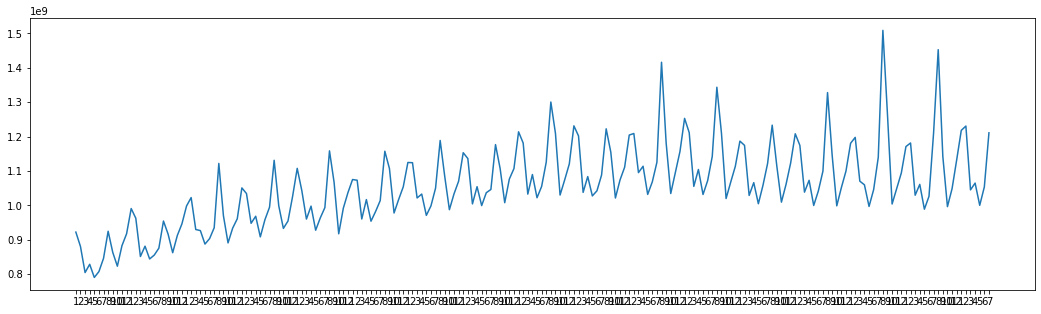

In [4]:
# 시도표: 이분산(lag에 따라 증가)과 증가추세 확인 가능 -> non-stationary
plt.figure(figsize=(18,5))
plt.plot(df)
plt.xticks(range(0, 199, 1), labels)
plt.show()

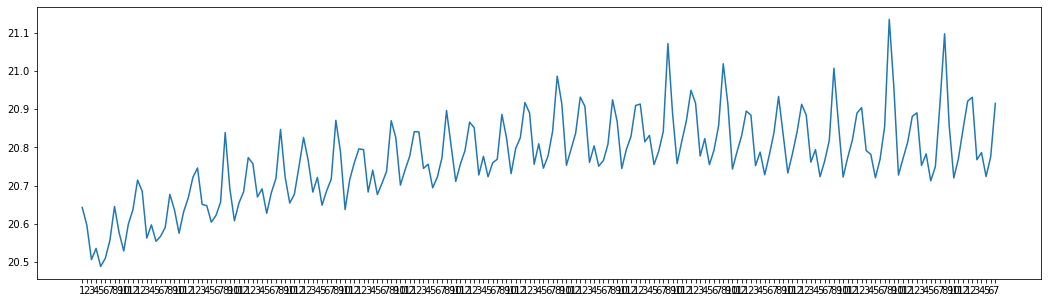

In [5]:
# 로그 변환 -> 분산 안정화 
df_log = np.log(df)

plt.figure(figsize=(18,5))
plt.plot(df_log)
plt.xticks(range(0, 199, 1), labels)
plt.show()

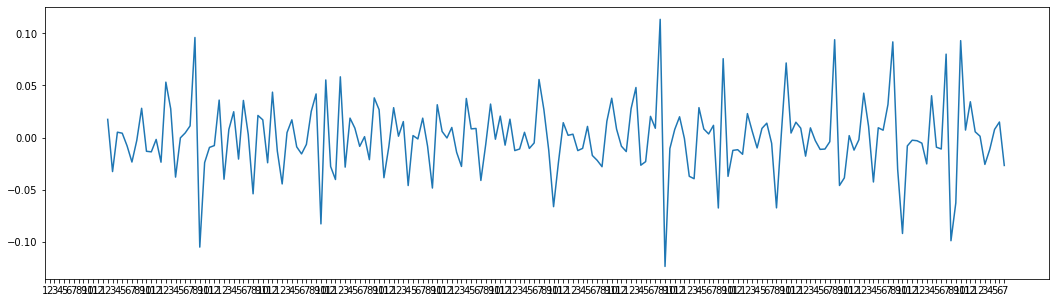

In [6]:
# 차분 
df_log_dif = df_log.diff(12) # 계절차분 -> 계절성 제거 
df_log_dif = df_log_dif.diff(1) # 차분 -> 추세 제거 

plt.figure(figsize=(18, 5))
plt.plot(df_log_dif)
plt.xticks(range(0, 199, 1), labels)
plt.show()

In [7]:
# 정상성 확인 by 단위근 검정: p-value under alpha 0.05 -> stationary 

elec = df_log_dif[0].tolist() # 정상성 검정을 위해 DataFrame -> 리스트 타입으로 변환

from statsmodels.tsa.stattools import adfuller 
result=adfuller(elec[13:])

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
# p-value: 2.772e-07 < 0.05 -> 정상성 만족 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -5.90137703692954
p-value: 2.7728900360238966e-07
Critical Values:
	1%: -3.469413468959902
	5%: -2.8786964197028295
	10%: -2.5759166089965397


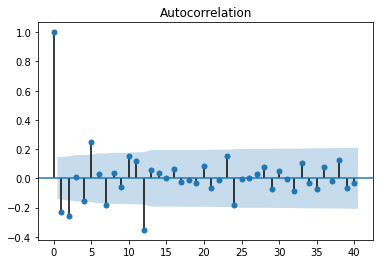

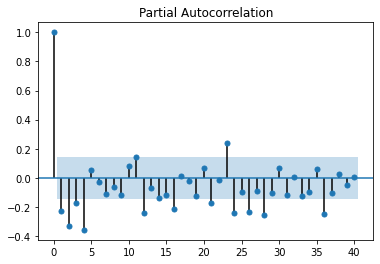

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_log_dif[0][13:], lags=40) # 지수적 감소 X -> p 추정(특정 시점 이후 절단 형태를 보인다면 해당 시점이 p)
plot_pacf(df_log_dif[0][13:], lags=40) # 절단 X -> q 추정(특정 시점 이후 절단 형태를 보인다면 해당 시점이 q)
plt.show()

In [9]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_log_dif[0][13:], order=(1, 0, 3)) # p=1, q=3
model_fit = model.fit(trend='nc',full_output=True, transparams=False) # nc: no constant
print(model_fit.summary())
# all coefficient significant (p-value ≈ 0)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  186
Model:                     ARMA(1, 3)   Log Likelihood                 389.514
Method:                       css-mle   S.D. of innovations              0.029
Date:                Sun, 26 Jul 2020   AIC                           -769.028
Time:                        02:39:01   BIC                           -752.899
Sample:                             0   HQIC                          -762.492
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.8722      0.077    -11.310      0.000      -1.023      -0.721
ma.L1.y        0.5026      0.093      5.405      0.000       0.320       0.685
ma.L2.y       -0.8781      0.082    -10.770      0.0

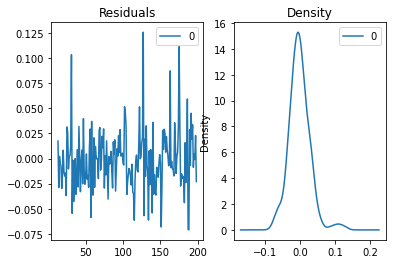

In [10]:
# Plot residual errors: 백색소음(분포 평균 0, 등분산)이어야 함. 잘 만족하는 것으로 보이지 않음. 
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0]) 
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

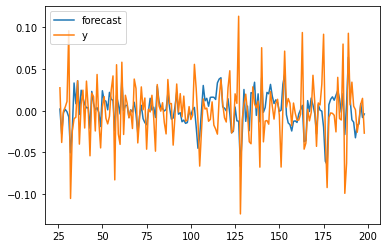

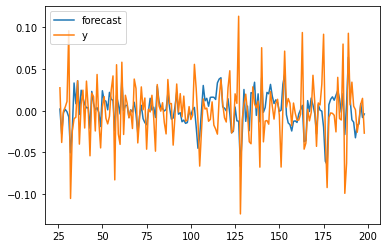

In [11]:
model_fit.plot_predict() 
# 튀어나온 pacf, acf를 보고 p,q를 결정해 유의한 계수를 얻었지만 예측 결과가 좋지 않음을 알 수 있다. 
# 더 다양한 조합 혹은 다른 변수 추가를 시도해봐야 할 것으로 보인다. 